## K Neighbors Classifier

In [1]:
#ofr any project : prepare the  environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix

data = load_breast_cancer()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3B59D50B8>,
      dtype=object)

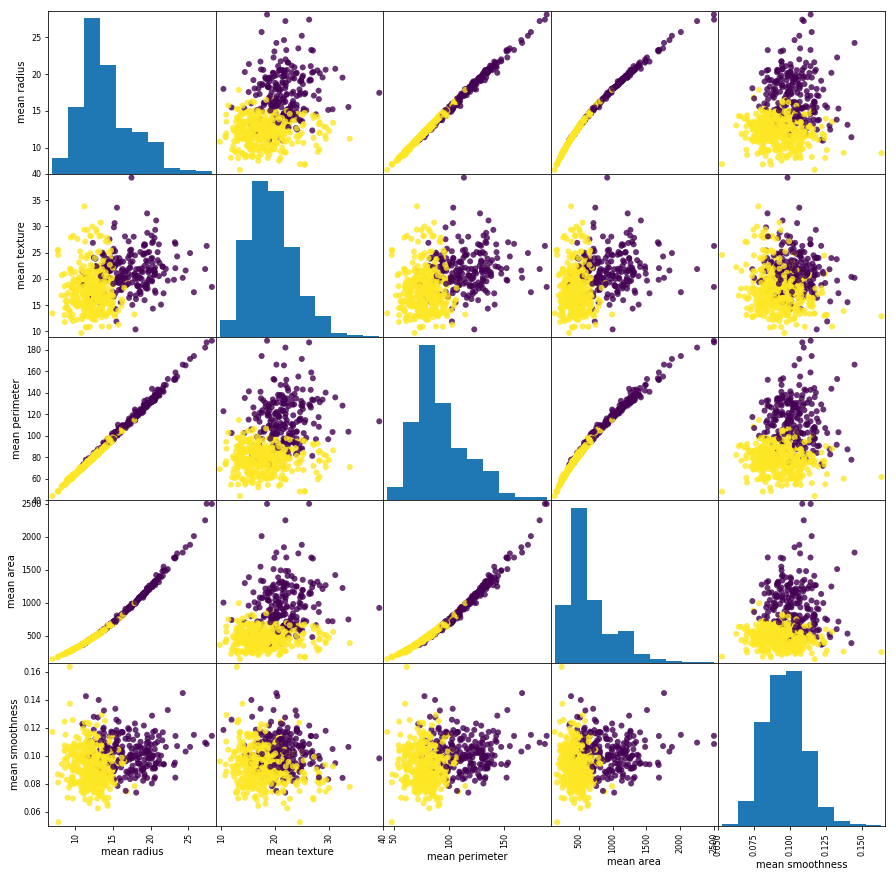

In [3]:
#check for matplotlib inline
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

attributes = data.feature_names[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#picks the first 5 rows od dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


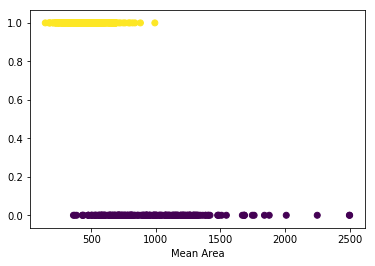

In [6]:
X_area = X.iloc[:,3]

plt.scatter(X_area, y, c = y)
plt.xlabel('Mean Area')
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [9]:
X_train

array([[0.1452506 , 0.32448133, 0.14249188, ..., 0.22387186, 0.26197516,
        0.14167651],
       [0.18074684, 0.50912863, 0.17275931, ..., 0.25783672, 0.27597083,
        0.14154532],
       [0.43348005, 0.21369295, 0.41814664, ..., 0.38890803, 0.23910901,
        0.09891119],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [10]:
#first split then scale; cal the variables within each column; 
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

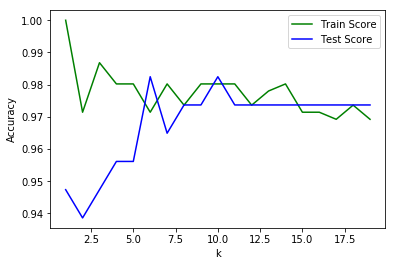

In [11]:
#k=1 will have oevrfitting?/ 10 is the best: high test n train score and 
#ever similar to each other
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

It seems k = 10 is the best parameter for knn model. 

In [12]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9802
Train score: 0.9825


In [13]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


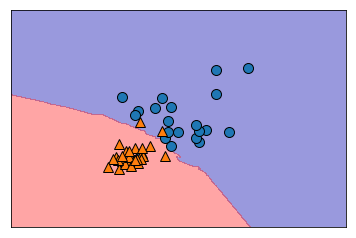

In [14]:
import mglearn
X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(10)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## K Neighbors Regressor

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001AFBC76860>,
      dtype=object)

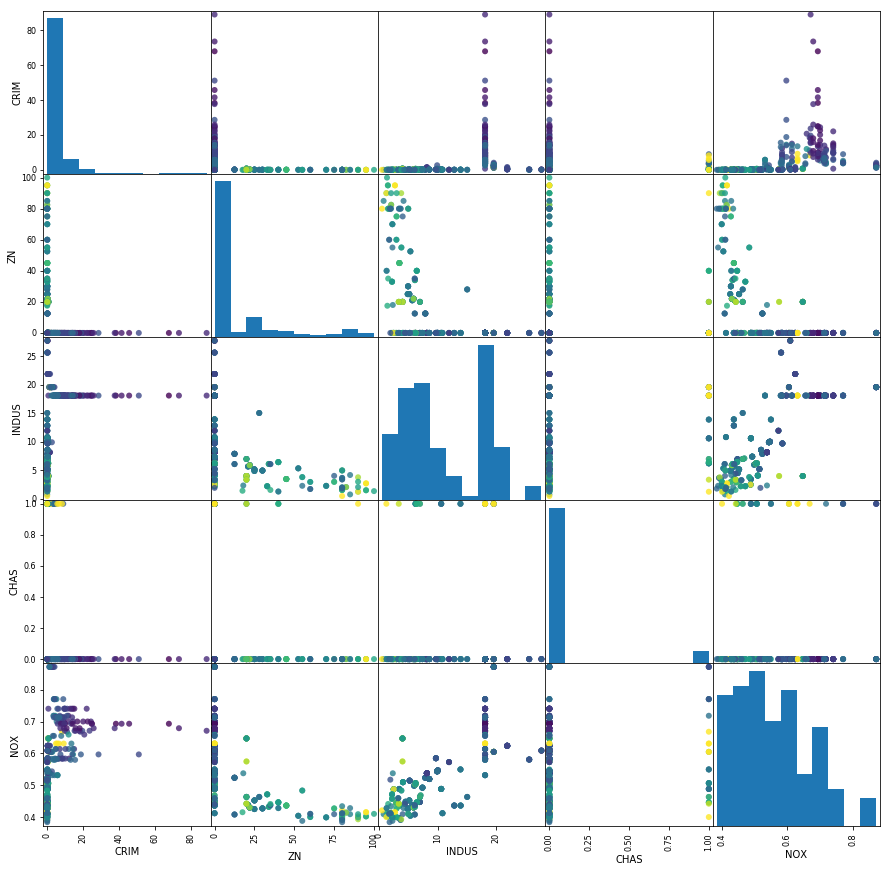

In [15]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

attributes = data.feature_names[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
X?

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0,0.5,'MSE')

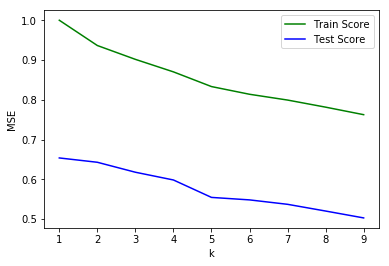

In [19]:
#this generally overfits, but if still if we want, we choose 1, since atleast 
#the test and train score is highest
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

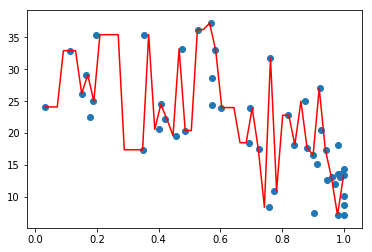

In [20]:
#CRIM and AGE
X_b = X_train[:50,6].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Linear regression using the Normal Equation

In [21]:
from sklearn.datasets import load_boston
import pandas as pd
data = load_boston()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [22]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [24]:
#first split then train; min max to stamdardize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [25]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.769744837056394
0.6353620786674622


Text(0.5,0,'RM')

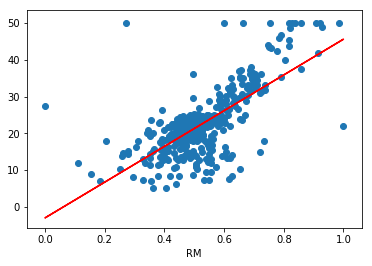

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## SGD Regressor

In [27]:
#instantiate means we can pass hyper parameter, we can set the random state
#max_iter=100000, means the loop will be exhausted before it reaches the max number, 
#hyperameter: also penalty function
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

0.7697348747781612
0.6350061132162148


In [28]:
sgd_reg.coef_

array([-10.17859301,   4.35015924,  -0.18885805,   2.40776734,
        -7.49782881,  19.54938804,  -0.66544037, -15.54005177,
         5.42852872,  -5.8514375 ,  -9.27203634,   3.39197265,
       -17.62591021])

In [29]:
#attribute and name ends with underscore
sgd_reg.intercept_

array([27.46208832])

In [30]:
sgd_reg.n_iter_

100000

## Polynomial regression

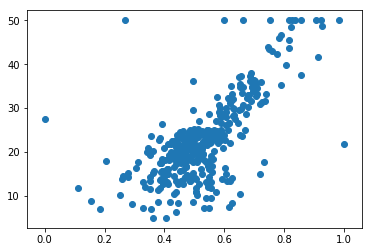

In [31]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [32]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [33]:
#reduce a degree to avoid overfiting
print(train_score_list)
print(test_score_list)

[0.769744837056394, 0.9523526436864241]
[0.6353620786674621, 0.6057754892935724]


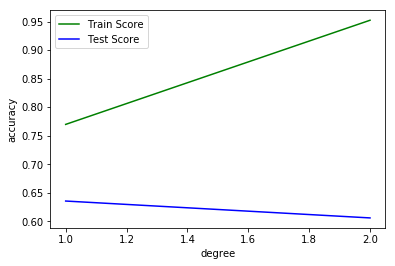

In [34]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

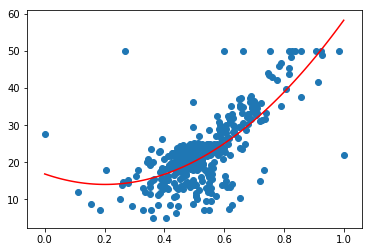

In [35]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

## Ridge

In [36]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

<IPython.core.display.Javascript object>


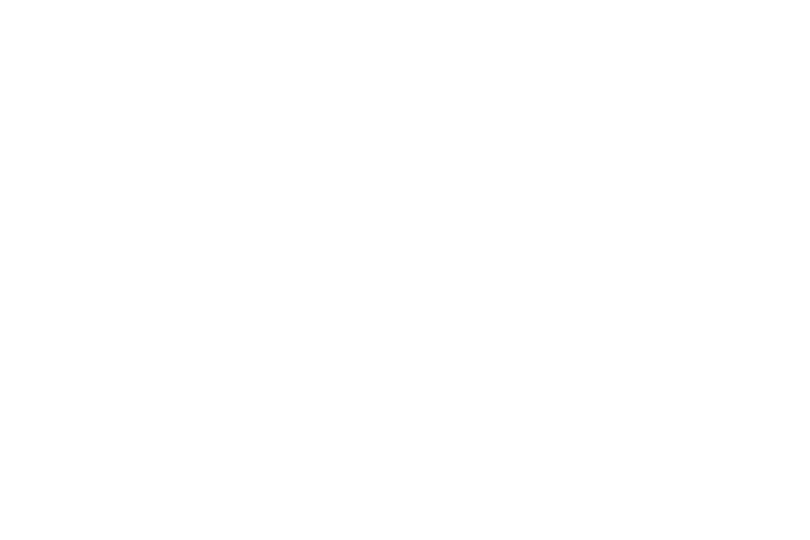

Text(0.5,0,'$\\alpha$')

<IPython.core.display.Javascript object>


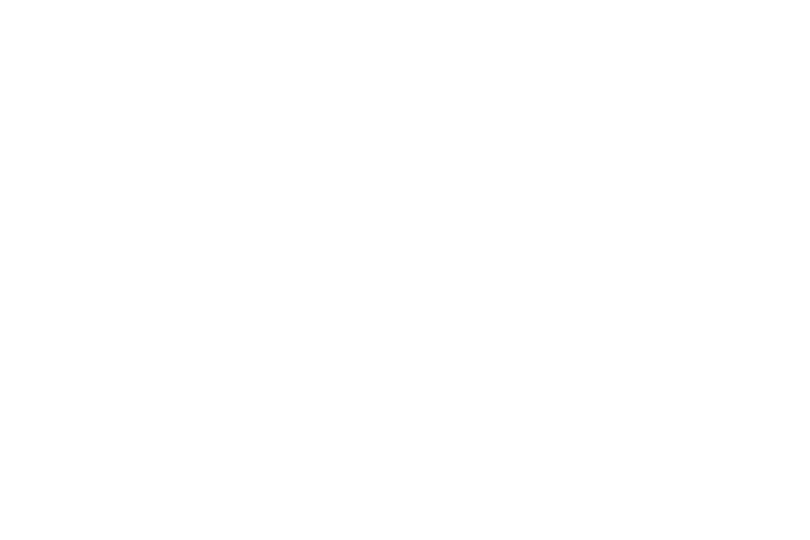

In [37]:
#if there is a consistent gap, look for highest value of test and train score, 
#value of alpha too small: its free, can grow upto some point, model is less regularized and alpha big: too controlled
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

This suggests that the best $\alpha$ parameter is 0.001

In [38]:
print(train_score_list)
print(test_score_list)

[0.7697441399653129, 0.7696793004359976, 0.7656304395477985, 0.6878007658918848, 0.40476397343275805]
[0.6352557313122166, 0.6342415939748298, 0.6213701408454402, 0.5086941239174199, 0.27141822731220433]


In [39]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7697
Test score: 0.6354


In [40]:
ridge.coef_

array([-10.391955  ,   4.39807429,  -0.14703706,   2.39489701,
        -7.59346168,  19.62895993,  -0.67462342, -15.71399208,
         5.51208476,  -5.91618099,  -9.27423275,   3.39344096,
       -17.62600392])

In [41]:
ridge.intercept_

27.482301880226103

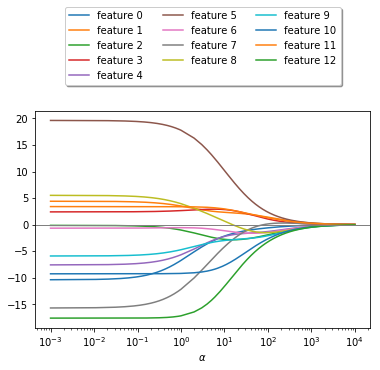

In [42]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### LASSO

In [43]:
#on of them receive higher value, anf rest all are negligible
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

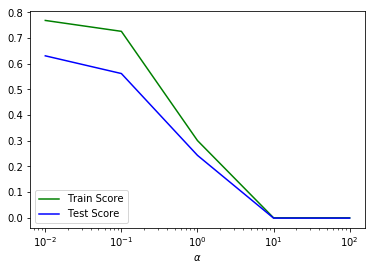

In [44]:
#suggests smaller power of alpha is the best parameter, power of 2
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

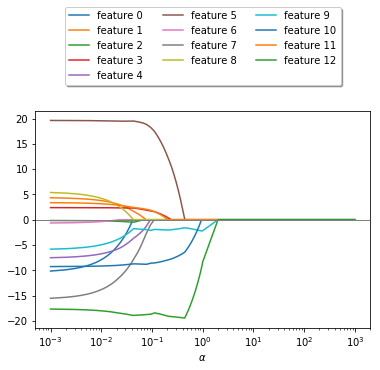

In [45]:
#multi colinearity is not a probl in ml; 
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Logistic Regression

In [46]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [48]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [49]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
y.sum()/len(y)

0.6274165202108963

In [52]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

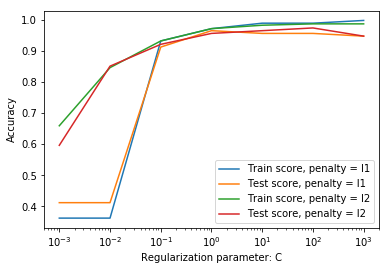

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

<IPython.core.display.Javascript object>


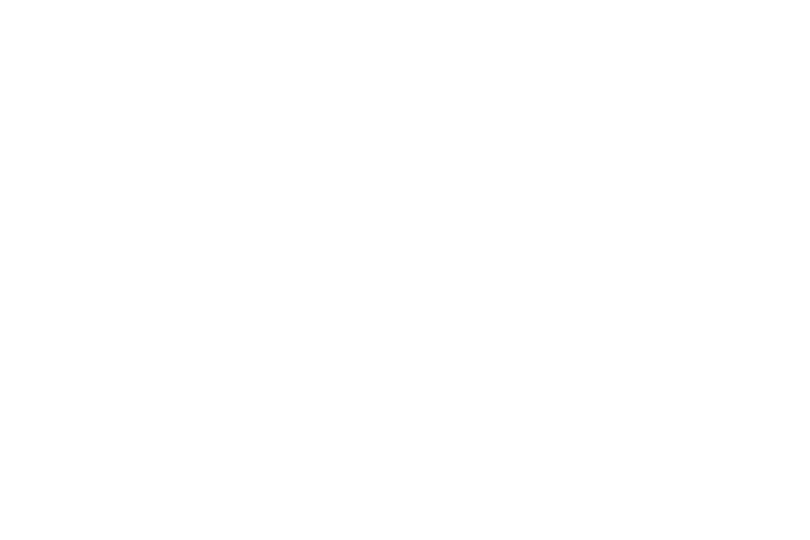

<IPython.core.display.Javascript object>


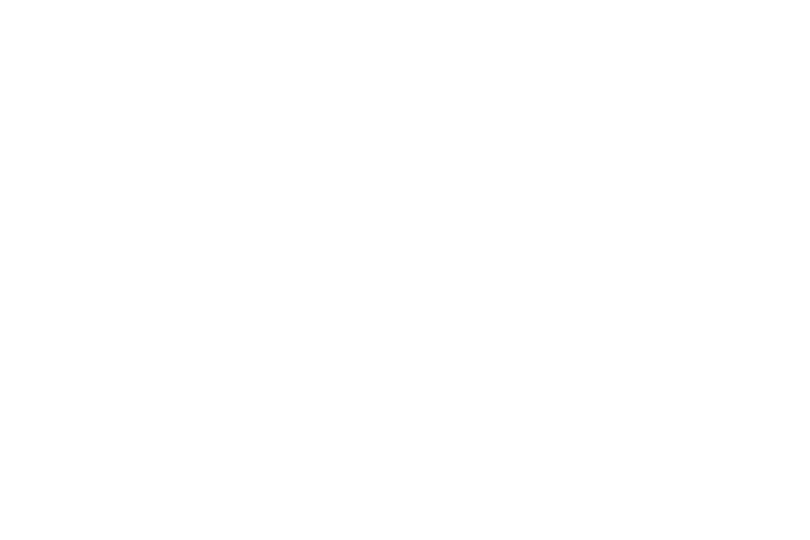

In [54]:
%matplotlib notebook
import mglearn
X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

## Softmax Regression

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()

In [56]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [57]:
#logistic usu on multi class; c value by defualt will be one 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
softmax_reg.predict([[5, 2]])

array([2])

In [59]:
softmax_reg.predict_proba([[5, 2]])

array([[1.33201624e-06, 7.91157082e-02, 9.20882960e-01]])

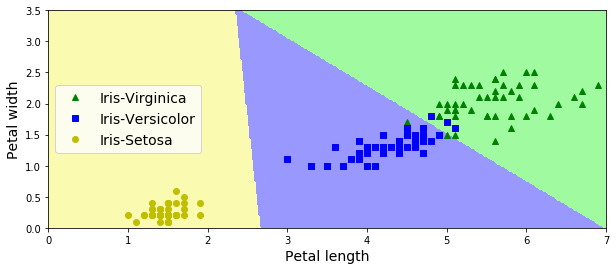

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## LinearSVC

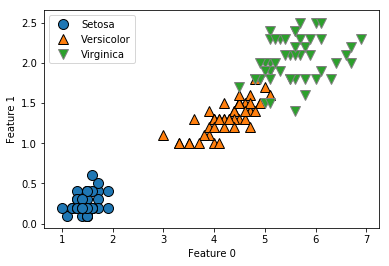

In [61]:
%matplotlib inline

from sklearn.datasets import load_iris
import mglearn
iris = load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [63]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


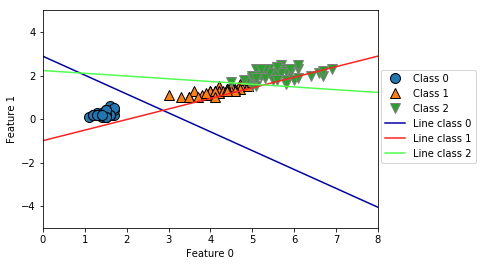

In [69]:
%matplotlib inline
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-5, 5)
plt.xlim(0, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

## SVC with kernel trick

In [8]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

<IPython.core.display.Javascript object>


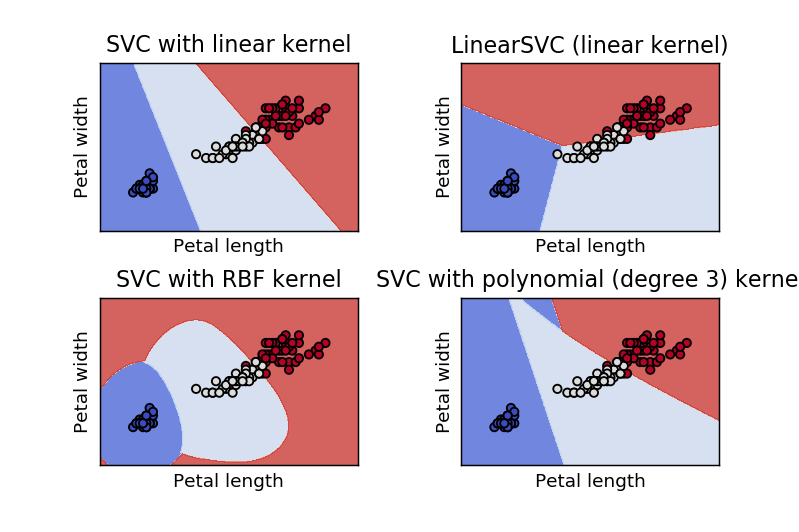

In [9]:
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C = 1.0  
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, C=C))

models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

<IPython.core.display.Javascript object>


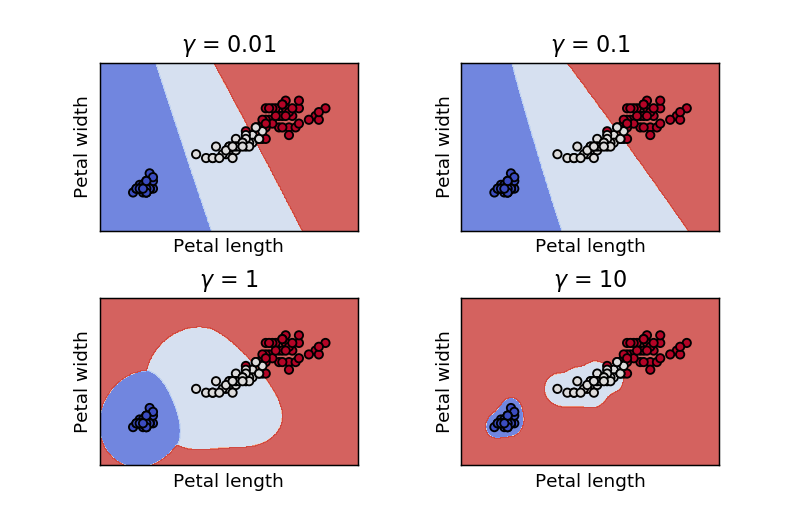

In [10]:
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


models = (SVC(kernel='rbf', gamma=0.01, C=1),
         SVC(kernel = 'rbf', gamma = 0.1, C = 1),
         SVC(kernel = 'rbf', gamma = 1, C = 1),
         SVC(kernel = 'rbf', gamma = 10, C = 1))


models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = (r'$\gamma$ = 0.01',
          r'$\gamma$ = 0.1',
          r'$\gamma$ = 1',
          r'$\gamma$ = 10')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [11]:
%matplotlib notebook

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

iris = datasets.load_iris()

X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


models = (SVC(kernel='rbf', gamma=0.7, C=0.01),
         SVC(kernel = 'rbf', gamma = 0.7, C = 0.1),
         SVC(kernel = 'rbf', gamma = 0.7, C = 1),
         SVC(kernel = 'rbf', gamma = 0.7, C = 10))


models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = (r'$\gamma$ = 0.01',
          r'$\gamma$ = 0.1',
          r'$\gamma$ = 1',
          r'$\gamma$ = 10')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

NameError: name 'datasets' is not defined

## Decision Tree

In [18]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)#random?state?

dtree = DecisionTreeClassifier(random_state=0)
#goes full length; no early stopping 
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.902


In [2]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0) #max depth is early stopping
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.909


In [15]:
import matplotlib.pyplot as plt
import numpy as np

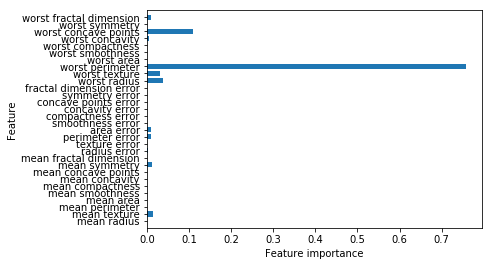

In [8]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') #feature importance will return the probability of the feature
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

In [13]:
import os  
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

ModuleNotFoundError: No module named 'graphviz'

In [20]:
import mglearn
from sklearn.tree import DecisionTreeClassifier

X_b =  X_train[:50,[2,7]]
y_b = y_train[:50]

dtree = DecisionTreeClassifier()
dtree.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(dtree, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

ModuleNotFoundError: No module named 'mglearn'

## Decision Tree Regressor

Dataset of historical computer memory (RAM) prices.

In [16]:
import os
import pandas as pd
import mglearn
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                      "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

ModuleNotFoundError: No module named 'mglearn'

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

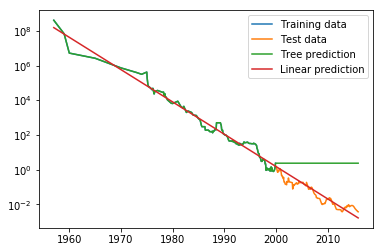

In [16]:
%matplotlib inline
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()